
## Section B rebuild the tree
- Neighbor joining tree based on distance matrix referred from https://www.tenderisthebyte.com/blog/2022/08/31/neighbor-joining-trees/
- This jupyter notebook requires a distance matrix generated from Section A
- Other reference: https://github.com/Alirezafathian/phylogenetic_tree/blob/master/notebooks/phylogenetic_tree.ipynb


In [1]:
import numpy as np
import pandas as pd

with open('D_r.npy','rb') as f:
        D_r = np.load(f)
with open('D_x.npy','rb') as f:
        D_x = np.load(f)

In [2]:
K_leaf = [e for e in range(D_x.shape[0])]
K_leaf



[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [ ]:
import itertools




def net_divergence(D, K_leaf):
    # Net divergence r for a node i with the rest of all active nodes in K_leaf
    # D is the latest distance matrix
    # K_leaf : the set of active leaf nodes
    
    # output: dict contains node name and its corresponding net divergence value.
    
    L = float(len(K_leaf)) 
    r = {}
    for i in K_leaf:
        # compute i's net divergence w.r.t. all other nodes
        r[i] = 0
        for j in K_leaf:
            if  i == j: # do not compute divergence of i with itself
                break
            else:
                r[i] += D[i][j]
            r[i] = (1/(L-2)) *r[i]
    
    return r
    


def adjusted_distance(D, K_leaf, r):
    # get all possible 2 nodes pairs from the active leaf list.
    pairs = list(itertools.combinations(K_leaf, 2)) # refer to: https://stackoverflow.com/questions/20762574/combinations-with-two-elements
    D_adj = {}
    for p in pairs:
        D_adj[pairs[p]] = D[p[0]][p[1]] - (r[p[0]] + r(p[1]))
    
    return D_adj
    


# Below is the script
  
r = net_divergence(D_r, K_leaf)
D_adj = adjusted_distance(D_r, K_leaf, r)
    

In [41]:

a = [0,2,5]
import itertools
pairs = list(itertools.combinations(a, 2))
for p in pairs:
    print(p)

(0, 2)
(0, 5)
(2, 5)


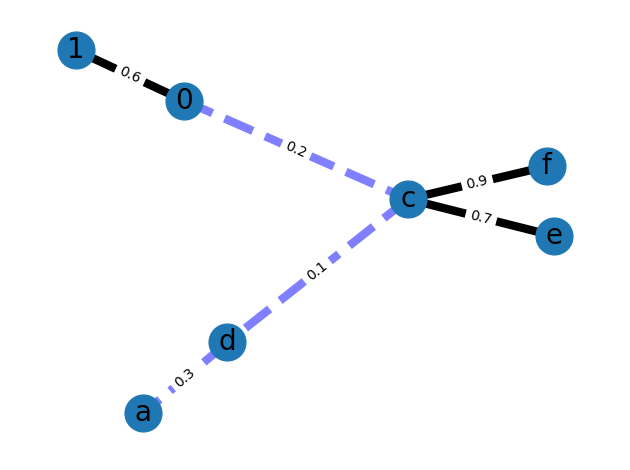

In [6]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge(0, 1, weight=0.6)
G.add_edge(0, "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()